In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from keras import optimizers

In [2]:
train_datagen=ImageDataGenerator(rescale=1/255)
validation_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory("/workspace/viransh/plant_village/train",target_size=(64,64),batch_size=16,class_mode='categorical')


validation_generator=validation_datagen.flow_from_directory("/workspace/viransh/plant_village/val",target_size=(64,64),batch_size=16,class_mode='categorical')


test_generator=test_datagen.flow_from_directory("/workspace/viransh/plant_village/test",target_size=(64,64),batch_size=16,class_mode='categorical')




Found 3002 images belonging to 4 classes.
Found 636 images belonging to 4 classes.
Found 546 images belonging to 4 classes.


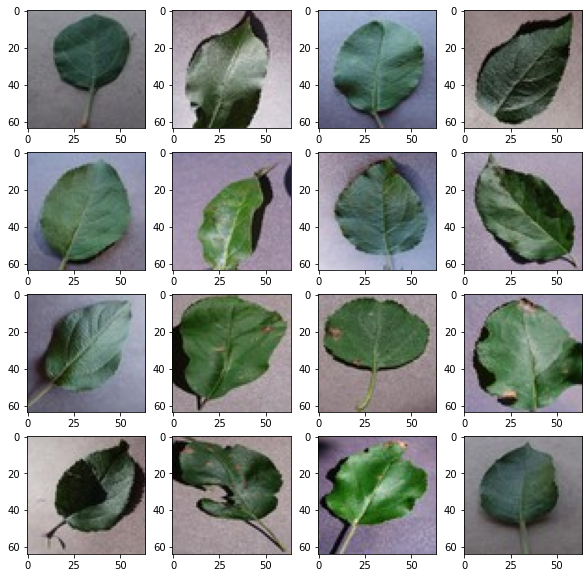

In [3]:
plt.figure(figsize=(10,10))
for i in range (1,17):
    plt.subplot(4,4,i)
    img, label = test_generator.next()
    plt.imshow(img[0])
plt.show()



In [4]:
model = Sequential()

model.add(Conv2D(16,kernel_size=(3,3),strides=1,padding='valid',activation='softmax',input_shape=(64,64,3)))
#model.add(Conv2D(32,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
#model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),strides=1,padding='valid',activation='softmax'))
#model.add(Conv2D(128,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
#model.add(Conv2D(256,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(256,activation='relu'))
#model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        9280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                    

2024-02-19 08:04:27.490375: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-19 08:04:27.490408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2024-02-19 08:04:27.491115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.compile(optimizer = optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['acc'])
#train
history=model.fit(train_generator,
                 steps_per_epoch=train_generator.samples/train_generator.batch_size,
                 epochs=10,
                 validation_data=validation_generator,
                 validation_steps=validation_generator.samples/validation_generator.batch_size,
                 verbose=1)

Epoch 1/10
187/187 [==============================] - 34s 178ms/step - loss: 1.4524 - acc: 0.4567 - val_loss: 1.2122 - val_acc: 0.5173
Epoch 2/10
187/187 [==============================] - 30s 161ms/step - loss: 1.2495 - acc: 0.4677 - val_loss: 1.2140 - val_acc: 0.5173
Epoch 3/10
187/187 [==============================] - 31s 168ms/step - loss: 1.2504 - acc: 0.4677 - val_loss: 1.1979 - val_acc: 0.5173
Epoch 4/10
187/187 [==============================] - 33s 177ms/step - loss: 1.2505 - acc: 0.4677 - val_loss: 1.2058 - val_acc: 0.5173
Epoch 5/10
187/187 [==============================] - 32s 173ms/step - loss: 1.2479 - acc: 0.4677 - val_loss: 1.2094 - val_acc: 0.5173
Epoch 6/10
187/187 [==============================] - 33s 175ms/step - loss: 1.2505 - acc: 0.4677 - val_loss: 1.2039 - val_acc: 0.5173
Epoch 7/10
187/187 [==============================] - 33s 176ms/step - loss: 1.2495 - acc: 0.4677 - val_loss: 1.1979 - val_acc: 0.5173
Epoch 8/10
187/187 [==============================] - 3

In [6]:
train_acc=history.history['acc']
val_acc=history.history['val_acc']
train_loss=history.history['loss']
val_loss=history.history['val_loss']

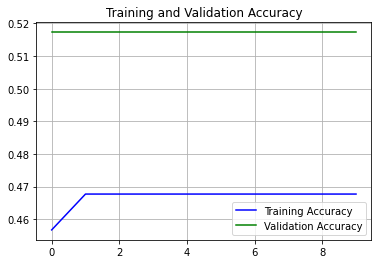

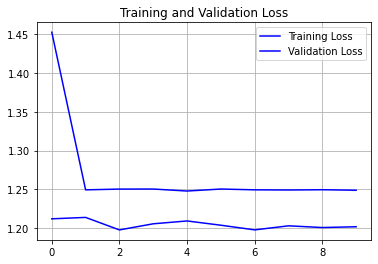

In [8]:
epochs=range(len(train_acc))
plt.plot(epochs,train_acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.show()

plt.plot(epochs,train_loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.show()

In [9]:
# # Get the ground truth from generator
ground_truth = test_generator.classes
print('ground_truth',ground_truth)
# # Get the label to class mapping from the generator
label2index = test_generator.class_indices
print('label2index',label2index)
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
print('predicted_classes',predicted_classes)
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


ground_truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3

/tmp/ipykernel_2006137/4158932243.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)


34/34 [==============================] - 2s 42ms/step
predicted_classes [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [10]:
accuracy = ((test_generator.samples-len(errors))/test_generator.samples) * 100
accuracy

47.61904761904761

In [14]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 294 kB 95 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


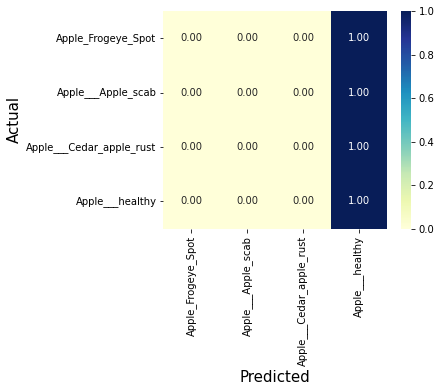

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
cm = confusion_matrix(y_true=ground_truth, y_pred=predicted_classes)
cm = np.array(cm)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=label2index, yticklabels=label2index, cmap="YlGnBu")
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Predicted', fontsize=15)
plt.show(block=False)